Challenge Begins
---
<div class="alert alert-block alert-success">
As time flies, Now the time let us attend compettiion:

[Tbrain by Trend-Micro](https://tbrain.trendmicro.com.tw)  台灣 ETF 價格預測競賽

 <div class="alert alert-block alert-warning">
1. Huge data file: the way to read a data file, chunk by chunk,
```python
chunksize = 10 ** 6
for chunk in pd.read_csv(filename, chunksize=chunksize):
       process(chunk)
```    

<div style="font-size:1.4em;">
    
|序號|欄位|說明|
|-:|-:|-:|
|0|ETFid|ETF 代號|
| 1| Mon_ud | 周一漲跌 (1:漲, 0:平, -1:跌) 50% |
| 2| Mon_cprice| 周一收盤價 (權重 50%) |
| 3| Tue_ud | 周二漲跌 (1:漲, 0:平, -1:跌) 50% |
| 4| Tue_cprice| 周二收盤價 (權重 50%) |
| 5| Wed_ud | 周三漲跌 (1:漲, 0:平, -1:跌) 50% |
| 6| Wed_cprice| 周三收盤價 (權重 50%) |
| 7| Thu_ud | 周四漲跌 (1:漲, 0:平, -1:跌) 50% |
| 8| Thu_cprice| 周四收盤價 (權重 50%) |
| 9| Fri_ud | 周五漲跌 (1:漲, 0:平, -1:跌) 50% |
| 10| Fri_cprice| 周五收盤價 (權重 50%) |

</div>
<div class="alert alert-block alert-info">
Sample

```
ETFid,Mon_ud,Mon_cprice,Tue_ud,Tue_cprice,Wed_ud,Wed_cprice,Thu_ud,Thu_cprice,Fri_ud,Fri_cprice
0050,1,87.15,1,88.05,-1,88.00,-1,87.25,1,87.45
...
```

In [1]:
#from hmmlearn.hmm import GaussianHMM
import numpy as np
from matplotlib import cm, pyplot as plt
import matplotlib.dates as dates
import pandas as pd
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [1]:
import pandas as pd
import numpy as np

from fbprophet import Prophet
#import pandas_profiling as pp
#from matplotlib import cm, pyplot as plt
import matplotlib.dates as dates
#import pandas_datareader.data as web
from pandas_datareader import data as web
import datetime
#from hmmlearn.hmm import GaussianHMM

import fix_yahoo_finance as yf
yf.pdr_override()

In [4]:
import time
today=time.strftime("%Y-%m-%d")
today

'2018-04-19'

|code|ETF|code|ETF|
| ------| :------: | :------: |---|
|0050|元大台灣50|0058|富邦發達|
|0051|元大中型100 |0059|富邦金融|
|0052|富邦科技|006201|元大富櫃50|
|0053|元大電子|006203|元大MSCI台灣|
|0054|元大台商50|006204|永豐臺灣加權 |
|0055|元大MSCI金融|006208|富邦台50|
|0056|元大高股息|00690|兆豐藍籌30|
|0057|富邦摩台|00692|富邦摩台|
|00701|國泰臺灣低波動30|00713|元大台灣高息低波|

In [5]:
# manually define the name of ETF's
etfs=['0050','0051','0052','0053','0054','0055','0056','0057','0058',
      '0059','006201','006203','006204','006208','00690','00692','00701','00713']

 <div class="alert alert-block alert-warning">
Create a new directory if not exists,
```python
import os
if os.path.exists("data"):
   print("exist")
else:
   os.mkdir("data")
```    

In [5]:
import os, sys

In [6]:
if os.path.exists("data1"):
   print("exist")
else:
   os.mkdir("data1") 

In [8]:
df0050_date=pd.read_csv("data/0050.csv",index_col='Date')

In [10]:
# convert index to valid datetime format
df0050_date.index=pd.to_datetime(df0050_date.index)

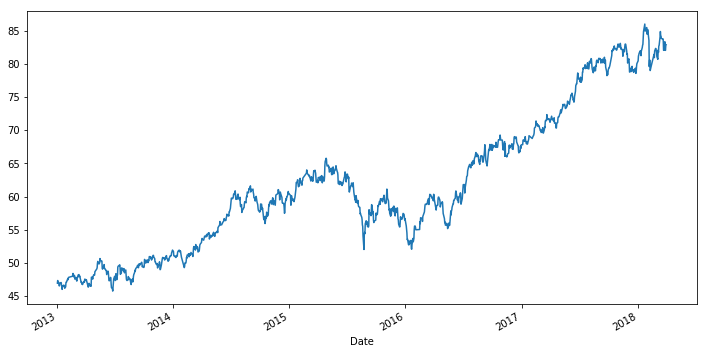

In [15]:
# et voilá
df0050_date['收盤價(元)'].plot(figsize=[12,6])

In [11]:
df0050_date=df0050_date.rename(columns={"代碼": "code", "日期": "date",'中文簡稱':'Name',"開盤價(元)":'Open',
                            "最高價(元)":'High',"最低價(元)":'Low',"收盤價(元)":'Close',"total":"Volume"});


In [13]:
# initialize  features about yesterday, close and volumes
df0050_date['yesterday_close'] = 0
df0050_date['yesterday_volume'] = 0

# get the values of yesterday's features by shift
df0050_date['yesterday_close'][1:] = df0050_date['Close'][:-1]
df0050_date['yesterday_volume'][1:] = df0050_date['Volume'][:-1]

# new feature for price change
df0050_date['price_change'] = df0050_date['Close'] - df0050_date['yesterday_close']

# new feature for volumes change
df0050_date['volume_Change'] = df0050_date['Volume'] - df0050_date['yesterday_volume']

# new feature for deal sign, 1 for up, -1 for down and 0 for unchanged
df0050_date['sign'] = np.sign(df0050_date['price_change']).astype('int')

In [19]:
df0050_date.head()

,code,date,Name,Open,High,Low,Close,Volume,weekday,yesterday_close,yesterday_volume,price_change,volume_Change,sign
Date,,,,,,,,,,,,,,
2013-01-02,50,20130102,元大台灣50,46.57,47.13,46.49,46.92,16487.0,2,0.00,0.0,46.92,16487.0,1
2013-01-03,50,20130103,元大台灣50,47.35,47.48,47.13,47.31,29020.0,3,46.92,16487.0,0.39,12533.0,1
2013-01-04,50,20130104,元大台灣50,47.31,47.31,46.92,47.00,9837.0,4,47.31,29020.0,-0.31,-19183.0,-1
2013-01-07,50,20130107,元大台灣50,47.05,47.05,46.49,46.79,8910.0,0,47.00,9837.0,-0.21,-927.0,-1
2013-01-08,50,20130108,元大台灣50,46.57,46.75,46.27,46.49,12507.0,1,46.79,8910.0,-0.30,3597.0,-1


Define the first function, **loaddf(*file*)**, after data  cleaning: 

In [6]:
def loaddf(file):
    """
    load csv file,
    1. convert column names (in english)
    2. create new features: price_change, volume_change, and sign
    """
    df = pd.read_csv(file,index_col='Date')
    df.index=pd.to_datetime(df.index)
    df=df.rename(columns={"代碼": "code", "日期": "date",'中文簡稱':'Name',"開盤價(元)":'Open',
                            "最高價(元)":'High',"最低價(元)":'Low',"收盤價(元)":'Close',"total":"Volume"});
    # initialize  features about yesterday, close and volumes
    df['yesterday_close'] = 0
    df['yesterday_volume'] = 0

    # get the values of yesterday's features by shift
    df['yesterday_close'][1:] = df['Close'][:-1]
    df['yesterday_volume'][1:] = df['Volume'][:-1]

    # new feature for price change
    df['price_change'] = df['Close'] - df['yesterday_close']

    # new feature for volumes change
    df['volume_change'] = df['Volume'] - df['yesterday_volume']

    # new feature for deal sign, 1 for up, -1 for down and 0 for unchanged
    df['sign'] = np.sign(df['price_change']).astype('int')
    return df

## Clean the data
```
df0050=loaddf("data/0050.csv")
```

In [8]:
df0050=loaddf("data/00713.csv")
df0050.to_csv("data1/00713.csv",index=True,index_label='Date',date_format="%Y-%m-%d")

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
def df_clean():
    for ind in etfs:
        ind_tmp1='data/%s.csv' %ind
        ind_tmp2='data1/%s.csv' %ind
        df0050=loaddf(ind_tmp1)
        df0050.to_csv(ind_tmp2,index=True,index_label='Date',date_format="%Y-%m-%d")

In [7]:
df_clean()

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cch/anaconda36/anaconda/lib/python3.6/si

In [60]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def LR(df):
    LinReg = linear_model.LinearRegression()
    X=(df.index - df.index[0]).days.values.reshape(-1, 1)
    Y=df.Close

    # Train the model using the training sets
    LinReg.fit(X,Y)
    return LinReg

In [35]:
# Create linear regression object
LinReg = linear_model.LinearRegression()

In [36]:
X=(df0050_date.index - df0050_date.index[0]).days.values.reshape(-1, 1)
Y=df0050_date.Close

# Train the model using the training sets
LinReg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Or use the function:
```
  LinReg= LR(df)
```
Here df is `df0050_date`

In [46]:
# Make predictions using the testing set
Y_pred = LinReg.predict(X)

In [54]:
LinReg.predict([[1914],[1915],[1916]])

array([78.69574836, 78.71343434, 78.73112031])

In [47]:
df0050_date['pred']=Y_pred 

In [49]:
df0050_date.tail()

,code,date,Name,Open,High,Low,Close,Volume,weekday,yesterday_close,yesterday_volume,price_change,volume_Change,sign,pred
Date,,,,,,,,,,,,,,,
2018-03-27,50,20180327,元大台灣50,83.00,83.40,82.95,83.40,3277.0,1,82.20,4369.0,1.20,-1092.0,1,78.625004
2018-03-28,50,20180328,元大台灣50,82.90,82.90,82.20,82.25,4161.0,2,83.40,3277.0,-1.15,884.0,-1,78.642690
2018-03-29,50,20180329,元大台灣50,82.25,82.35,81.80,82.10,4099.0,3,82.25,4161.0,-0.15,-62.0,-1,78.660376
2018-03-30,50,20180330,元大台灣50,82.65,83.05,82.65,82.85,4994.0,4,82.10,4099.0,0.75,895.0,1,78.678062
2018-03-31,50,20180331,元大台灣50,82.85,83.05,82.75,82.95,878.0,5,82.85,4994.0,0.10,-4116.0,1,78.695748


In [29]:
# The coefficients
print('Prediction: \n', LinReg.intercept_,' + ',LinReg.coef_,'X_Close')
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y, Y_pred))


Prediction: 
 44.84478561900075  +  [0.01768598] X_Close
Mean squared error: 17.01
Variance score: 0.85


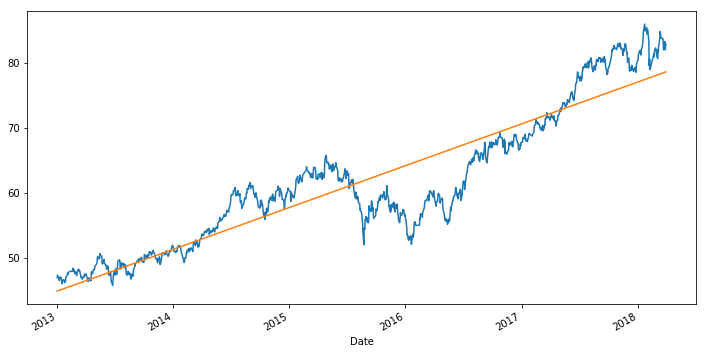

In [30]:
# Finally
df0050_date['Close'].plot(figsize=[12,6])
df0050_date['pred'].plot()

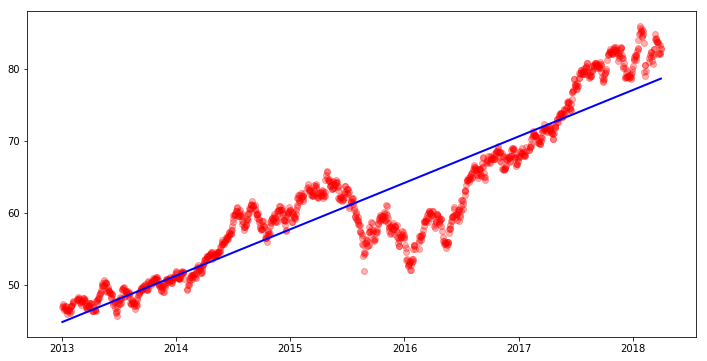

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(df0050_date.index, Y,  color='r', alpha=0.3)
plt.plot(df0050_date.index, Y_pred, color='blue', linewidth=2)

#plt.xticks(())
#plt.yticks(())

FaceBook Prophet Introduction
---
One of most prediction package recently for time-series, especially for economical data; it acclaims:
1. simple, only 'ds' and 'y', date and observers quantity, are required;
- as usual usual, claim the model, training and predict. 

You should admire this for its compactness!

In [55]:
from fbprophet import Prophet

In [64]:
dffb=pd.DataFrame()
dffb['y'] = df0050_date['Close']

dffb['ds'] = pd.to_datetime(df0050_date.index)

Modeling Prediction
---

- Input ```df.ds, df.y```: datetime and data we want to predict, define them if none;
- Output ```df.yhat, df.yhat_upper, df.yhat_lower```: 95% CI's

In [65]:
#model = Prophet(mcmc_samples=500)
model = Prophet(daily_seasonality=True)
model.fit(dffb);

In [66]:
future = model.make_future_dataframe(periods=7)
future[-14:]

,ds
1279,2018-03-23
1280,2018-03-26
1281,2018-03-27
1282,2018-03-28
1283,2018-03-29
1284,2018-03-30
1285,2018-03-31
1286,2018-04-01
1287,2018-04-02
1288,2018-04-03


In [71]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
1279,2018-03-23,84.357977,82.794064,85.875876
1280,2018-03-26,84.363827,82.696532,85.898627
1281,2018-03-27,84.425036,82.839588,85.854448
1282,2018-03-28,84.385864,82.842905,85.933698
1283,2018-03-29,84.443438,82.963978,85.860827
1284,2018-03-30,84.403093,82.886421,86.034967
1285,2018-03-31,84.207766,82.635628,85.780601
1286,2018-04-01,84.182652,82.636842,85.640578
1287,2018-04-02,84.444788,82.920730,86.021605
1288,2018-04-03,84.528752,82.915979,86.073266


In [75]:
def dffp(df,period=7):
    """
    df: dataframe
    period: the period of fufure prediction we made
    output: the predicted LR dataframe included prediction in original datetime 
    """
    df1=pd.DataFrame()
    df1['y'] = df['Close']
    df1['ds'] = pd.to_datetime(df.index)
    model = Prophet(daily_seasonality=True)
    model.fit(df1)
    future = model.make_future_dataframe(periods=period)
    forecast = model.predict(future)
    return forecast

**Usage for predicted LR Model**
```
forecast_test=dffp(df0050_date)
forecast_test[['ds','yhat', 'yhat_lower', 'yhat_upper']]
```

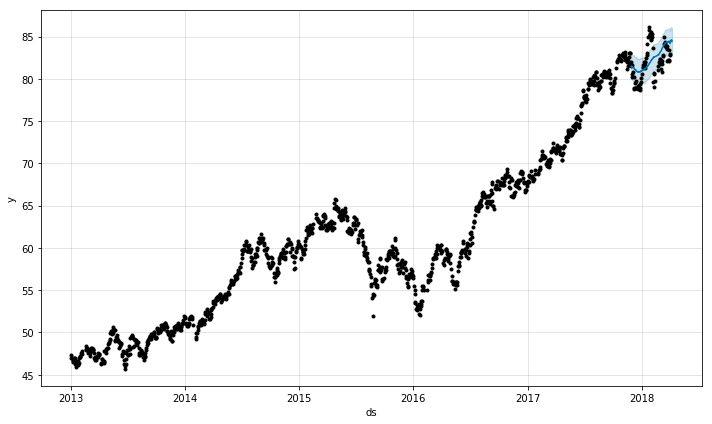

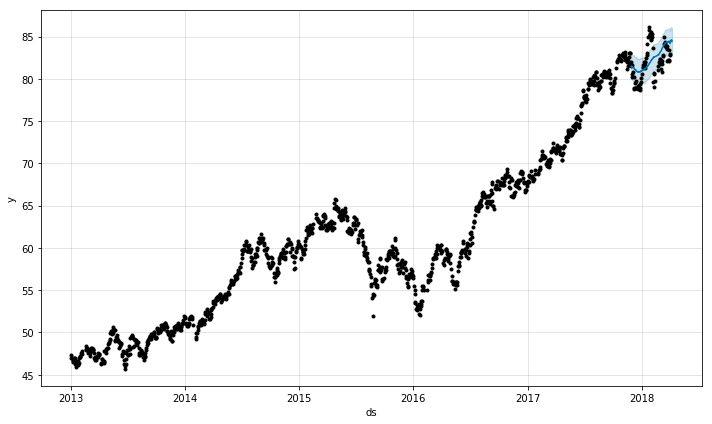

In [78]:
obs=forecast[-90:]
model.plot(obs)

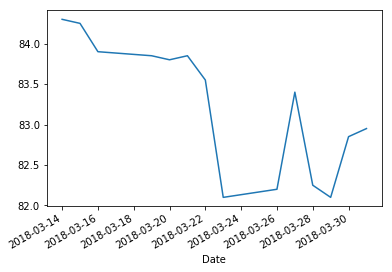

In [82]:
dffb.y[-14:].plot()


In [63]:
fb.yhat

1272    84.097931
1273    84.198956
1274    84.193642
1275    84.282432
1276    84.361557
1277    84.334574
1278    84.398314
1279    84.357977
1280    84.363827
1281    84.425036
1282    84.385864
1283    84.443438
1284    84.403093
1285    84.207766
Name: yhat, dtype: float64

(80, 90)

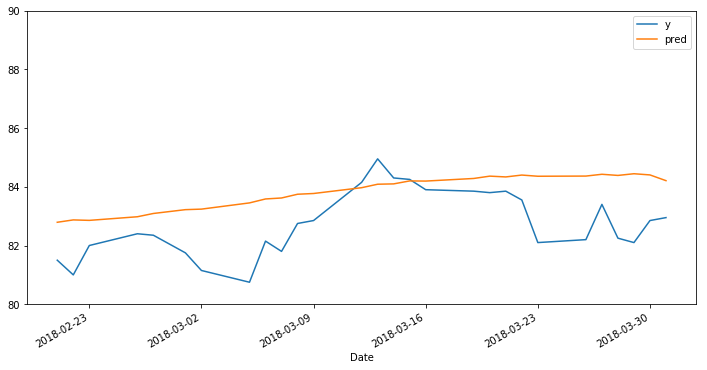

In [81]:

fb=forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']][-35:-7]

plt.figure(figsize=(12,6))
dffb.y[-28:].plot()
plt.plot(fb.ds,fb.yhat,label='pred')
plt.legend()
plt.ylim(80,90)

In [ ]:
Conclusion 
---
Linear Regression is a very fast algorithm but accuracy is not good.


In [ ]:
def regress_process(estimator, train_x, train_y_regress, test_x,
                    test_y_regress):
    # 训练训练集数据
    estimator.fit(train_x, train_y_regress)
    # 使用训练好的模型预测测试集对应的y，即根据usFB的走势特征预测股价涨跌幅度
    test_y_prdict_regress = estimator.predict(test_x)

    # 绘制usFB实际股价涨跌幅度
    plt.plot(test_y_regress.cumsum())
    # 绘制通过模型预测的usFB股价涨跌幅度
    plt.plot(test_y_prdict_regress.cumsum())

    # 针对训练集数据做交叉验证
    scores = cross_val_score(estimator, train_x, train_y_regress, cv=10, scoring=mean_squared_error_scorer)
    # mse开方 -> rmse
    mean_sc = -np.mean(np.sqrt(-scores))
    print('{} RMSE: {}'.format(estimator.__class__.__name__, mean_sc))


In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# use pipeline to emerge degree-3 and LinearRegression
estimator = make_pipeline(PolynomialFeatures(degree=3),
                          LinearRegression())

In [124]:
def NonLR(df,degree=3):
    estimator = make_pipeline(PolynomialFeatures(degree=degree),
                          LinearRegression())
    X=(df.index - df.index[0]).days.values.reshape(-1, 1)
    Y=df.Close

    # Train the model using the training sets
    estimator.fit(X,Y)
    return estimator

In [130]:
PolyEstimator=NonLR(df0050_date,degree=3)

In [131]:
X=(df0050_date.index - df0050_date.index[0]).days.values.reshape(-1, 1)
Y=df0050_date.Close

In [132]:
Y_pred_non = PolyEstimator.predict(X)

In [133]:
LinReg.predict([[1914],[1915],[1916]])

array([78.69574836, 78.71343434, 78.73112031])

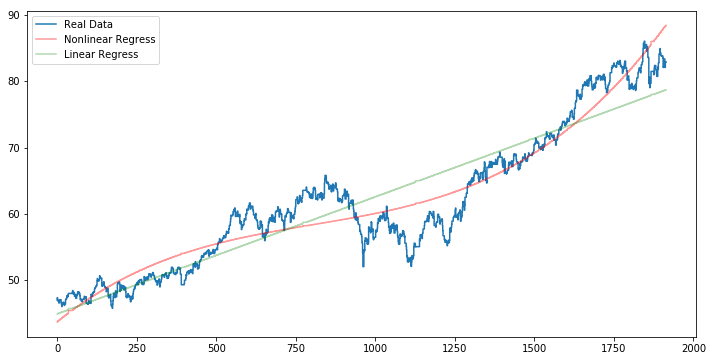

In [134]:
plt.figure(figsize=(12,6))

plt.step(X,Y,label='Real Data')
plt.step(X,Y_pred_non,'r--',label='Nonlinear Regress',alpha=0.4)
plt.step(X,Y_pred,'g--',label='Linear Regress',alpha=0.3)
plt.legend()

**Improvement of Estimator**

Following shows how the RMSError descreases while we lead in the Nonliner Polynomial Estimator: 

In [135]:
# The coefficients
print('Prediction of Linear Regression')
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y, Y_pred))


Prediction of Linear Regression
Mean squared error: 17.01
Variance score: 0.85


In [136]:
# The coefficients
print('Prediction of Nolinear Polynomial Regression')
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred_non))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y, Y_pred_non))


Prediction of Nolinear Polynomial Regression
Mean squared error: 9.12
Variance score: 0.92


Boosting
---

**adaboost**

Initialize a Sequence of categrories of $n$ sample, $M=(M_i)_{i}= (M_1,M_2,\cdots,M_m)$; and improve the accuracy of training based on the previous results.

1. assign weight, $s=(s_i)_n$, for each sample.
- training and calculte accuracy
- evaluate whether each sample is in the right categrory; if not increate the weight, correct the fault in the next training;
- repeate 2-3 while the $M$ is confirmed;
- normailze sum of accuracies of $M$ being 1, says $(w)=(w_i)$ and get the model as
 $$ M=\sum_{i=1}^m w_iM_i=\mathbf{w\cdot M}$$

In [154]:
from sklearn.ensemble import AdaBoostRegressor

def adaboost(df,nEstimators=100):
    
    estimator = AdaBoostRegressor(n_estimators=nEstimators)
    X=(df.index - df.index[0]).days.values.reshape(-1, 1)
    Y=df.Close

    # Train the model using the training sets
    estimator.fit(X,Y)
    return estimator

In [139]:
AdaBoostEstimator=adaboost(df0050_date)

In [155]:
Y_pred_adaboost = AdaBoostEstimator.predict(X)

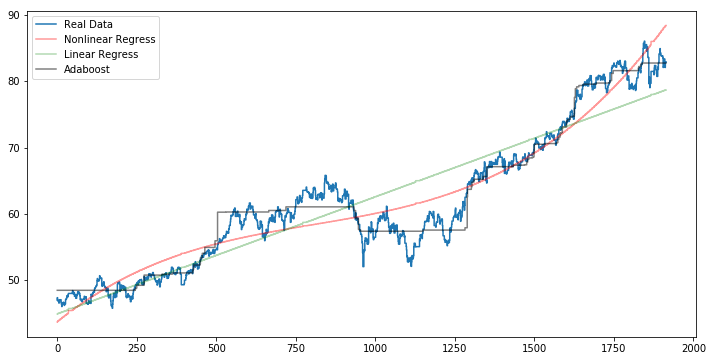

In [144]:
plt.figure(figsize=(12,6))

plt.step(X,Y,label='Real Data')
plt.step(X,Y_pred_non,'r--',label='Nonlinear Regress',alpha=0.4)
plt.step(X,Y_pred,'g--',label='Linear Regress',alpha=0.3)
plt.step(X,Y_pred_adaboost,'k--',label='Adaboost',alpha=0.5)

plt.legend()

In [145]:
# The coefficients
print('Prediction of AdaBoost')
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred_adaboost))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y, Y_pred_adaboost))


Prediction of AdaBoost
Mean squared error: 2.51
Variance score: 0.98


Another Boost Model, Gradient-Boosting
---
Not based on correcting previous training, but on the difference between real data and previous prediction.


Decision Tree
---
Decision tree alothim is an efficient way to make a tree-like graphic where we can start at the "root" and traverse our way down by making decisions at the "branches" before finally ending up at a "leaf" that gives you the prediction.

The general steps for building a (regression) decision tree are as follows:

1. At beginning, start with the sample $S$, and Feature set $F={f_1,f_2,\cdots}$.
- entropy of information is defined as follows:
$$ \text{Entropy}= -\sum_i p_i\log_2p_i$$
$$ \text{MSE}=\frac{1}{n}\sqrt{\sum_i^n(\hat {x_i\!}-x_i)^2}$$
- Find the degree of decend for partition Samples with each features and find out which one is fastest, for instance:
$$S=S_1(<f_i)\cup S_2(>f_i)$$

- Remove the feature, $f_i$, and repeate above to prune the stem until no feature exists. 

The implement schemes are in  included in `sklearn.tree.DecisionTreeClassifier` and `sklearn.tree.DecisionTreeRegressor` for supervised and non-supervised training respectively.


However, training accuracy should depend on the chosen *root*. Random Forest Model could be treated as baggage of decision-tree algoritms on randomly chosen sub-samples.


In [116]:
test1=df0050_date.copy()

test1['datetime']=test1.index
test1['week_day'] = test1['datetime'].dt.weekday_name
test1=pd.get_dummies(test1)

In [14]:
df0050_date=pd.read_csv("data1/0050.csv",index_col='Date')
df0050_date.index=pd.to_datetime(df0050_date.index)

In [36]:
df0050_date.columns

Index(['code', 'date', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume',
       'weekday', 'yesterday_close', 'yesterday_volume', 'price_change',
       'volume_change', 'sign'],
      dtype='object')

In [38]:
df_sub=df0050_date[['date','Open', 'High', 'Low','Volume', 'weekday', 
             'yesterday_close', 'yesterday_volume', 'price_change',
             'volume_change', 'sign']]

In [15]:
X=df_sub.as_matrix()
Y=df0050_date.Close

In [49]:
features=['date','Open', 'High', 'Low','Volume', 'weekday', 
             'yesterday_close', 'yesterday_volume', 'price_change',
             'volume_change', 'sign']

In [52]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

def DecisionTree(df,min_samples_split=20, random_state=99,criterion='mse'):
    df_sub=df[features]
    
    estimator = DecisionTreeRegressor(min_samples_split=min_samples_split, random_state=random_state,
                                       criterion=criterion)
    #X=(df.index - df.index[0]).days.values.reshape(-1, 1)
    X=df_sub.as_matrix()
    Y=df.Close

    # Train the model using the training sets
    estimator.fit(X,Y)
    return estimator

In [53]:
DecisionTreestimator=DecisionTree(df0050_date)

Y_pred_DT = DecisionTreestimator.predict(X)

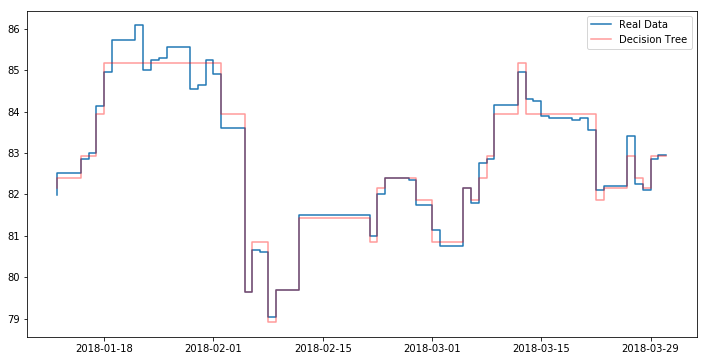

In [54]:
plt.figure(figsize=(12,6))

plt.step(df0050_date.index[-50:],Y[-50:],label='Real Data')
plt.step(df0050_date.index[-50:],Y_pred_DT[-50:],'r--',label='Decision Tree',alpha=0.4)


plt.legend()

In [62]:
# The coefficients
print('Prediction of Decision Tree Method')
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred_DT))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y, Y_pred_DT))


Prediction of Decision Tree Method
Mean squared error: 0.03
Variance score: 1.00


In [46]:
DecisionTreestimator

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=99, splitter='best')

To make visualize the DecisionTree result, install pydotplus by `pip`.

In [50]:
import subprocess

export_graphviz(DecisionTreestimator,out_file="tree.dot",feature_names=features,rotate=True,
                filled=True,rounded=True)
command = ["dot", "-Tpng", "tree.dot", "-o", "3.png"]
subprocess.check_call(command)

0

In [55]:
from sklearn.ensemble import RandomForestRegressor

def rfc(df,nEstimators=100):
    df_sub=df[features]
    estimator = RandomForestRegressor(n_estimators=nEstimators)
    X=df_sub.as_matrix()
    Y=df.Close

    # Train the model using the training sets
    estimator.fit(X,Y)
    return estimator

In [56]:
rfcEstimator=rfc(df0050_date)
Y_pred_rfc = rfcEstimator.predict(X)

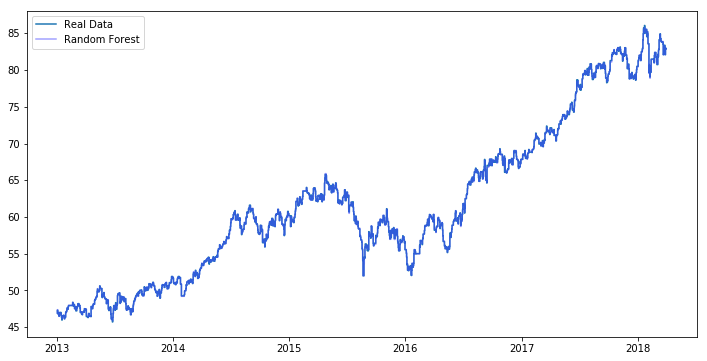

In [58]:
plt.figure(figsize=(12,6))

plt.step(df0050_date.index,Y,label='Real Data')
#plt.step(X,Y_pred_non,'r--',label='Nonlinear Regress',alpha=0.4)
#plt.step(X,Y_pred,'g--',label='Linear Regress',alpha=0.3)
#plt.step(X,Y_pred_adaboost,'k--',label='Adaboost',alpha=0.5)
plt.step(df0050_date.index,Y_pred_rfc,'#4444ff',label='Random Forest',alpha=0.5)
plt.legend()

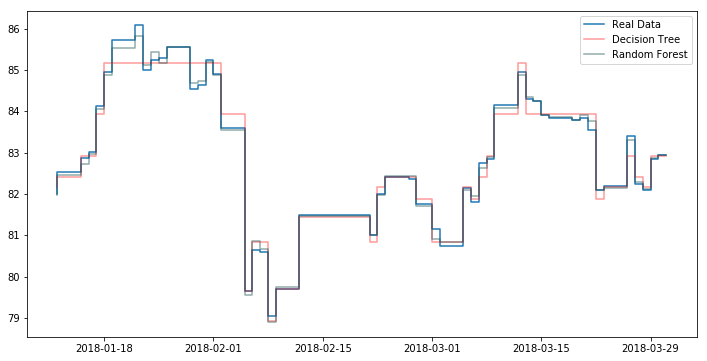

In [74]:
plt.figure(figsize=(12,6))

plt.step(df0050_date.index[-50:],Y[-50:],label='Real Data')
plt.step(df0050_date.index[-50:],Y_pred_DT[-50:],'r--',label='Decision Tree',alpha=0.4)
plt.step(df0050_date.index[-50:],Y_pred_rfc[-50:],'#225555',label='Random Forest',alpha=0.5)

plt.legend()

In [66]:
print(' There are %d numbers of DT\'s in Random Forest Method' %len(rfcEstimator.estimators_))

 There are 100 numbers of DT's in Random Forest Method


**The Board of importance of Features in the Estimator** 

In [103]:
from sklearn.feature_selection import RFE


def feature_selection(estimator, x, y,features=features):
    selector = RFE(estimator)
    selector.fit(x, y)
    print('Importance of Features selection for Random Forest Estimator')
    print(pd.DataFrame(
        {'support': selector.support_, 'ranking': selector.ranking_},
        index=features))


feature_selection(rfcEstimator, X,Y)

Importance of Features selection for Random Forest Estimator
                  ranking  support
date                    1     True
Open                    1     True
High                    1     True
Low                     1     True
Volume                  3    False
weekday                 6    False
yesterday_close         1     True
yesterday_volume        5    False
price_change            2    False
volume_change           4    False
sign                    7    False


In [111]:
# Visualization of Importance
importances = list(rfcEstimator.feature_importances_)

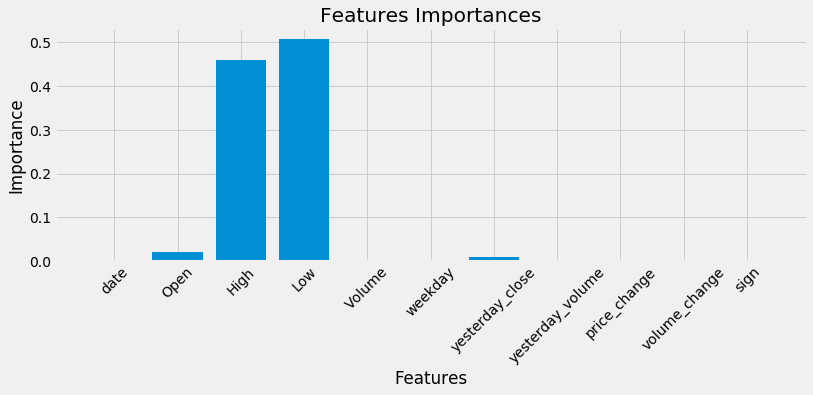

In [110]:
# Set the style
plt.figure(figsize=(12,4))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_val = list(range(len(importances)))
# Make a bar chart
plt.bar(x_val, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_val, features, rotation=45)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Features Importances');

In [135]:
rfcEstimator.predict

TypeError: predict() missing 1 required positional argument: 'X'

## Make Prediction file

After all,

In [91]:
todays_date = datetime.datetime.now().date()
# predict next weekays at Friday 
indexs = pd.date_range(todays_date-datetime.timedelta(-3), periods=5, freq='D')

In [90]:
indexs

DatetimeIndex(['2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [95]:
columns = ['ETFid','Mon_ud','Mon_cprice','Tue_ud','Tue_cprice','Wed_ud','Wed_cprice',
           'Thu_ud','Thu_cprice','Fri_ud','Fri_cprice']

dfs= pd.DataFrame(index=indexs, columns=columns)
# Fill zero's rater than Nan 
dfs = dfs.fillna(0)


In [96]:
dfs

,ETFid,Mon_ud,Mon_cprice,Tue_ud,Tue_cprice,Wed_ud,Wed_cprice,Thu_ud,Thu_cprice,Fri_ud,Fri_cprice
2018-04-26,0,0,0,0,0,0,0,0,0,0,0
2018-04-27,0,0,0,0,0,0,0,0,0,0,0
2018-04-28,0,0,0,0,0,0,0,0,0,0,0
2018-04-29,0,0,0,0,0,0,0,0,0,0,0
2018-04-30,0,0,0,0,0,0,0,0,0,0,0
